In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [6]:
print("Холодный год ", df.groupby(df.Day.dt.year).mean().idxmin().values[0])
print("Теплый год ", df.groupby(df.Day.dt.year).mean().idxmax().values[0])

Холодный год  2012
Теплый год  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [10]:
a = df[(df.Day.dt.month == 1) & (df.t >= 0)].groupby(df.Day.dt.year).count()
print(a)
a['Day'].idxmax()

      Day   t
Day          
2008   19  19
2009   11  11
2011    5   5
2012    6   6
2013    5   5
2014    8   8
2015   14  14
2016    5   5


2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [14]:
a = df[(df.Day.dt.month == 6) | (df.Day.dt.month == 7) | (df.Day.dt.month == 8)].groupby(df.Day.dt.year).mean()
print(a)
a.idxmin().values[0]

              t
Day            
2008  18.119565
2009  18.728261
2010  22.119565
2011  21.318681
2012  19.086957
2013  21.543478
2014  20.706522
2015  19.032609
2016  19.326087


2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [16]:
dif = df['t'].diff().abs()
print(dif.max(), df.iloc[dif.idxmax()].Day)

15.0 2014-05-27 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

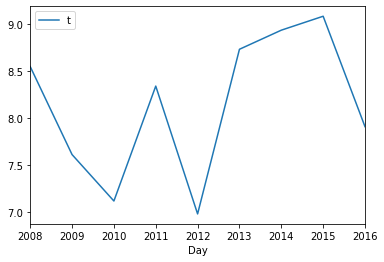

In [17]:
df.groupby(pd.Grouper(key="Day", freq="1YS")).mean().plot()